In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [11]:
data=pd.read_csv("./data/ObesityDataSet_raw_and_data_sinthetic.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Explication du tableau

| Colonne                        | Description                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| **Gender**                     | Sexe de la personne (`Male` ou `Female`).                                   |
| **Age**                        | Âge (en années).                                                            |
| **Height**                     | Taille (en mètres).                                                         |
| **Weight**                     | Poids (en kilogrammes).                                                     |
| **family_history_with_overweight** | Antécédents familiaux d’obésité (`yes` / `no`).                           |
| **FAVC**                       | *Frequent consumption of high caloric food* → consommation fréquente d’aliments riches en calories (`yes` / `no`). |
| **FCVC**                       | *Frequency of consumption of vegetables* → fréquence de consommation de légumes (1 = faible, 2 = moyenne, 3 = élevée). |
| **NCP**                        | *Number of main meals* → nombre de repas principaux par jour (1 à 4).       |
| **CAEC**                       | *Consumption of food between meals* → grignotage entre les repas (`no`, `Sometimes`, `Frequently`, `Always`). |
| **SMOKE**                      | Est-ce que la personne fume (`yes` / `no`).                                 |
| **CH2O**                       | Consommation quotidienne d’eau (1 = <1L, 2 = 1–2L, 3 = >2L).                |
| **SCC**                        | *Calories consumption monitoring* → suivi/calcul des calories (`yes` / `no`). |
| **FAF**                        | *Physical activity frequency* → fréquence d’activité physique (0 = jamais, jusqu’à 3–4 = très fréquent). |
| **TUE**                        | *Time using technology devices* → temps quotidien devant les écrans (0 = faible, 1 = moyen, 2 = élevé). |
| **CALC**                       | *Consumption of alcohol* → consommation d’alcool (`no`, `Sometimes`, `Frequently`, `Always`). |
| **MTRANS**                     | *Transportation used* → mode de transport habituel (`Automobile`, `Motorbike`, `Bike`, `Public_Transportation`, `Walking`). |
| **NObeyesdad**                 | 🚨 **Variable cible (label)** : catégorie d’obésité (`Insufficient_Weight`, `Normal_Weight`, `Overweight_Level_I`, `Overweight_Level_II`, `Obesity_Type_I`, `Obesity_Type_II`, `Obesity_Type_III`). |


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [13]:
data.shape

(2111, 17)

In [14]:
data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [15]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
data['Gender'].value_counts()

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [17]:
data['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [18]:
data['FAVC'].value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

In [19]:
data['CAEC'].value_counts().sort_values()

CAEC
no              51
Always          53
Frequently     242
Sometimes     1765
Name: count, dtype: int64

In [20]:
data['SMOKE'].value_counts().sort_values()

SMOKE
yes      44
no     2067
Name: count, dtype: int64

In [21]:
data['SCC'].value_counts().sort_values()

SCC
yes      96
no     2015
Name: count, dtype: int64

In [22]:
data['CALC'].value_counts().sort_values()

CALC
Always           1
Frequently      70
no             639
Sometimes     1401
Name: count, dtype: int64

In [23]:
data['MTRANS'].value_counts().sort_values()

MTRANS
Bike                        7
Motorbike                  11
Walking                    56
Automobile                457
Public_Transportation    1580
Name: count, dtype: int64

In [24]:
data['NObeyesdad'].value_counts().sort_values()

NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Overweight_Level_I     290
Overweight_Level_II    290
Obesity_Type_II        297
Obesity_Type_III       324
Obesity_Type_I         351
Name: count, dtype: int64

In [25]:
doublons=data.duplicated().sum()
print(doublons)

24


In [361]:
'''corr_matrix = data.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()'''

"corr_matrix = data.corr()\nplt.figure(figsize=(7, 7))\nsns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)\nplt.title('Matrice de Corrélation')\nplt.show()"

In [26]:
# Créer les colonnes Male et Female
data['Male'] = (data['Gender'] == 'Male').astype(int)
data['Female'] = (data['Gender'] == 'Female').astype(int)

In [27]:
dummies=pd.get_dummies(data['MTRANS'],prefix='MTRANS')

In [28]:
dummies = dummies.astype(int)

In [29]:
data = pd.concat([data, dummies], axis=1)

In [30]:
map_NObeyesdad={'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}
map_CALC={'no':0,'Sometimes':2,'Frequently':3,'Always':4}
data['NObeyesdad_num']=data['NObeyesdad'].map(map_NObeyesdad)
data['CALC_num']=data['CALC'].map(map_CALC)

In [31]:
data['IMC']=data['Weight']/(data['Height']**2)

In [32]:
columns_select=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE','Male','Female','MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking','CALC_num','IMC','NObeyesdad_num']
data_select=data[columns_select]

In [372]:
data_select.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Male,Female,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CALC_num,IMC,NObeyesdad_num
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,0,0,0,1,0,0,24.386526,1
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,0,0,0,1,0,2,24.238227,1
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,0,0,0,1,0,3,23.765432,1
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,0,0,0,0,1,3,26.851852,2
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,0,0,0,1,0,2,28.342381,3


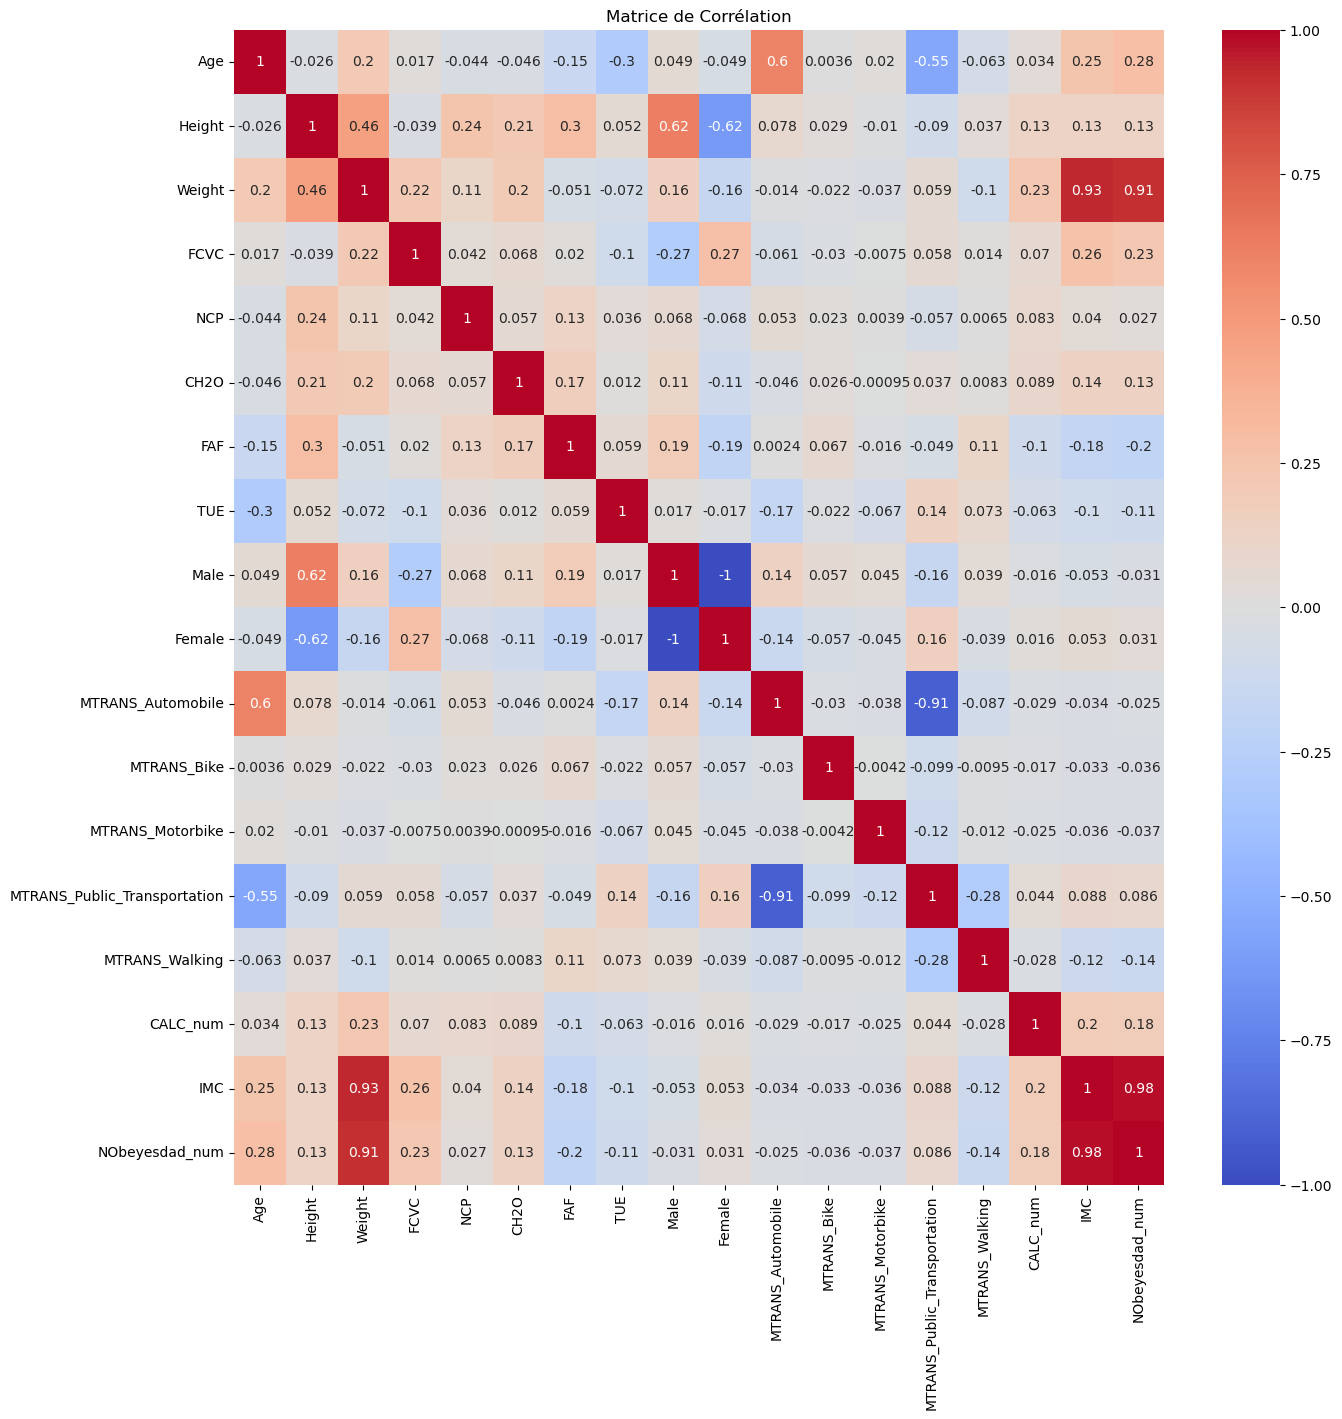

In [33]:
corr_matrix = data_select.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

In [34]:
columns_select=['Height','Weight','FCVC','IMC','NObeyesdad_num']
data_select=data[columns_select]

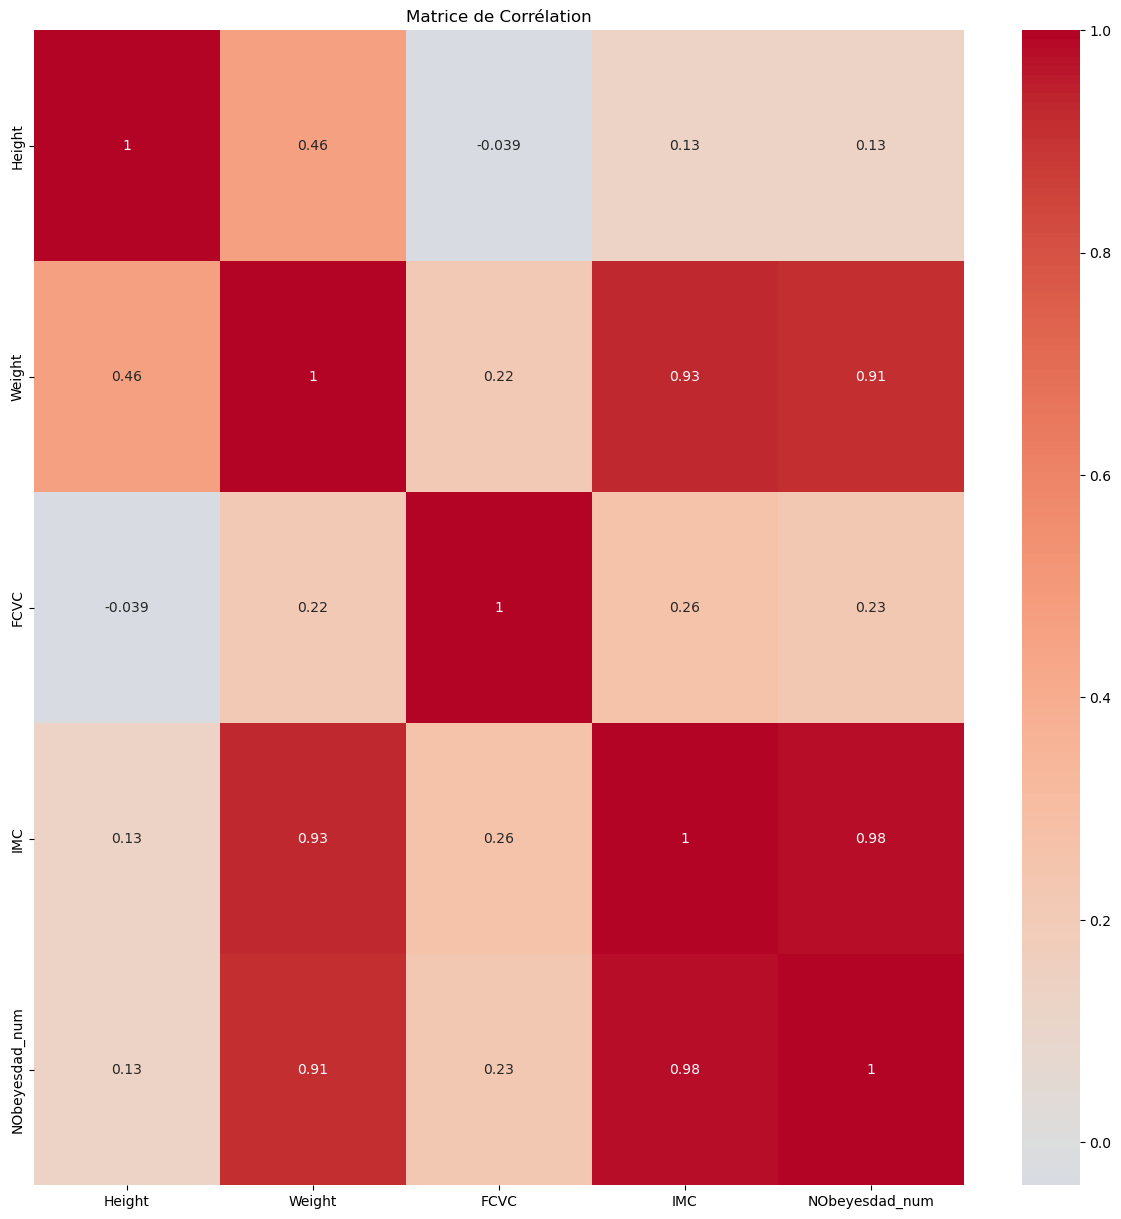

In [35]:
corr_matrix = data_select.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

In [36]:
pipelines_and_params = {
    "Random Forest": (
        Pipeline([
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        {
            'clf__n_estimators': [100, 200, 300],
            'clf__max_depth': [None, 5, 10],
            'clf__min_samples_split': [2, 5, 10]
        }
    ),
    "Gradient Boosting": (
        Pipeline([
            ('clf', GradientBoostingClassifier(random_state=42))
        ]),
        {
            'clf__n_estimators': [100, 200, 300],
            'clf__learning_rate': [0.01, 0.05, 0.1],
            'clf__max_depth': [3, 4, 5]
        }
    ),
    "SVM": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', SVC(probability=True, random_state=42))  # proba activée
        ]),
        {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['rbf', 'linear']
        }
    ),
    "Régression Logistique": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', LogisticRegression(max_iter=200, random_state=42))
        ]),
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l2']
        }
    ),
    "KNN": (
        Pipeline([
            ('scaler', StandardScaler()),
            ('clf', KNeighborsClassifier())
        ]),
        {
            'clf__n_neighbors': [3, 5, 7, 9],
            'clf__weights': ['uniform', 'distance'],
            'clf__metric': ['euclidean', 'manhattan']
        }
    )
}

In [37]:
# Séparation X / y
X = data_select.drop(columns=['NObeyesdad_num'])
y = data_select['NObeyesdad_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:

best_models = {}
results = []

for name, (pipeline, params) in pipelines_and_params.items():
    print(f"\n🔍 Entraînement du modèle : {name} ...")
    
    grid = GridSearchCV(
        pipeline,
        params,
        cv=3,              # validation croisée
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"✅ Meilleur {name} : {grid.best_params_}")
    print(f"🎯 Score sur test : {acc:.4f}")
    
    results.append((name, acc, grid.best_params_))

# ⚡ 3. Afficher un résumé
print("\n📊 Résumé des modèles :")
for name, acc, params in results:
    print(f"{name:<20} | Accuracy: {acc:.4f} | Best params: {params}")

# ⚡ 4. Exemple : Probabilités avec le meilleur modèle
best_model_name, best_model_acc, _ = max(results, key=lambda x: x[1])
best_model = best_models[best_model_name]

print(f"\n🔥 Meilleur modèle global : {best_model_name} (Accuracy={best_model_acc:.4f})")

y_pred_proba = best_model.predict_proba(X_test)

print("\nExemple de probabilités (5 premières lignes):")
print(pd.DataFrame(y_pred_proba[:5], columns=best_model.classes_))


🔍 Entraînement du modèle : Random Forest ...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Meilleur Random Forest : {'clf__max_depth': 10, 'clf__min_samples_split': 10, 'clf__n_estimators': 100}
🎯 Score sur test : 0.9764

🔍 Entraînement du modèle : Gradient Boosting ...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Meilleur Gradient Boosting : {'clf__learning_rate': 0.05, 'clf__max_depth': 5, 'clf__n_estimators': 200}
🎯 Score sur test : 0.9835

🔍 Entraînement du modèle : SVM ...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Meilleur SVM : {'clf__C': 10, 'clf__kernel': 'rbf'}
🎯 Score sur test : 0.9669

🔍 Entraînement du modèle : Régression Logistique ...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Meilleur Régression Logistique : {'clf__C': 10, 'clf__penalty': 'l2'}
🎯 Score sur test : 0.9574

🔍 Entraînement du modèle : KNN ...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Meilleur KNN : {'clf__metric':

features les plus importantes pour Gradient Boosting :
  Feature  Importance
3     IMC    0.869280
2    FCVC    0.092628
1  Weight    0.022284
0  Height    0.015808


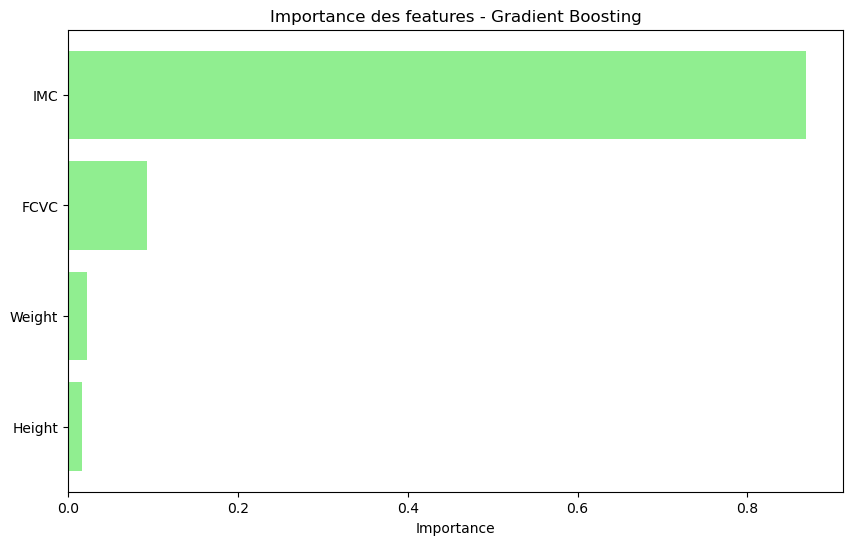

In [39]:
# --- Récupération du Gradient Boosting dans le pipeline ---
gb = best_model.named_steps["clf"]  # suppose que best_model est le pipeline GB
features = X_train.columns           # noms des features utilisées

# --- Importance des features ---
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": gb.feature_importances_
}).sort_values(by="Importance", ascending=False)

# --- Afficher le top 10 features ---
print("features les plus importantes pour Gradient Boosting :")
print(importance_df.head(10))

# --- Barplot horizontal ---
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='lightgreen')
plt.gca().invert_yaxis()  # feature la plus importante en haut
plt.xlabel("Importance")
plt.title("Importance des features - Gradient Boosting")
plt.show()